In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D #library for 3D-plot

### Sample mean과 Sample covariance의 계산

Sample mean vector
- $\bar{\mathbf{x}} = \frac{\sum_{i=1}^{N}{\mathbf{x}_i}}{N}$ 

Sample covariance matrix
- $\bar{\mathbf{\Sigma}} = \frac{\sum_{i=1}^{N}{ (\mathbf{x_i} - \bar{\mathbf{x}}) (\mathbf{x_i} - \bar{\mathbf{x}})^T}}{N-1}$ 

Q: 왜 $(N-1)$로 나눠주는지?

A: $(N-1)$로 나누어야 Sample covariance matrix의 평균이 Covariance matrix가 된다. (Unbiased estimator)
- 증명 https://mycourses.aalto.fi/pluginfile.php/364838/mod_resource/content/1/Proof%20that%20Sample%20Variance%20is%20Unbiased.pdf

In [3]:
def sample_mean(x):
    # implement here
    
def sample_covariance(x):
    # implement here

In [5]:
N_samples = 10000
mu1 = np.array([0.0, 0.0])
mu2 = np.array([20.0, 30.0, 40.0])
mu3 = np.array([40.0, 0.0, 10.0, 5.0])

cov1 = np.array([[1,0],[0,1]])
cov2 = np.array([[1,0,0],[0,1,0],[0,0,1]])
cov3 = np.array([[1,0,0,0],[0,1,0,0],[0,0,1,0],[0,0,0,1]])

# mean1 = np.zeros((N_repeat, mu1.shape[0]))
# mean2 = np.zeros((N_repeat, mu2.shape[0]))
# mean3 = np.zeros((N_repeat, mu3.shape[0]))

# sample_cov1 = np.zeros((N_repeat,mu1.shape[0],mu1.shape[0]))
# sample_cov2 = np.zeros((N_repeat,mu2.shape[0],mu2.shape[0]))
# sample_cov3 = np.zeros((N_repeat,mu3.shape[0],mu3.shape[0]))

# compute the mean of 'sample mean' and 'sample variance'
#for i in range(0, N_repeat):
g1 = np.random.multivariate_normal(mean=mu1, cov=cov1,size=N_samples)
g2 = np.random.multivariate_normal(mean=mu2, cov=cov2,size=N_samples)
g3 = np.random.multivariate_normal(mean=mu3, cov=cov3,size=N_samples)

print('g1 mean / sample mean')
print(mu1, sample_mean(g1))
print('g1 cov')
print(cov1)
print('g1 sample cov')
print(sample_covariance(g1))

print('g2')
print(mu2, sample_mean(g2))
print('g2 cov')
print(cov2)
print('g2 sample cov')
print(sample_covariance(g2))

print('g3')
print(mu3, sample_mean(g3))
print('g3 cov')
print(cov3)
print('g3 sample cov')
print(sample_covariance(g3))

g1 mean / sample mean
(array([ 0.,  0.]), array([-0.00469848,  0.01015242]))
g1 cov
[[1 0]
 [0 1]]
g1 sample cov
[[ 1.00350983 -0.01036791]
 [-0.01036791  0.98784833]]
g2
(array([ 20.,  30.,  40.]), array([ 19.99796951,  29.98557265,  40.01538706]))
g2 cov
[[1 0 0]
 [0 1 0]
 [0 0 1]]
g2 sample cov
[[ 1.02395937  0.00905253  0.01723   ]
 [ 0.00905253  0.99275674 -0.00246244]
 [ 0.01723    -0.00246244  1.00097184]]
g3
(array([ 40.,   0.,  10.,   5.]), array([  3.99939611e+01,  -1.38871654e-02,   1.00111382e+01,
         4.99315703e+00]))
g3 cov
[[1 0 0 0]
 [0 1 0 0]
 [0 0 1 0]
 [0 0 0 1]]
g3 sample cov
[[  9.96349803e-01   5.85039601e-03  -2.41617313e-02   1.08176139e-03]
 [  5.85039601e-03   1.00239410e+00  -1.32880079e-02  -3.34023320e-04]
 [ -2.41617313e-02  -1.32880079e-02   1.00888745e+00  -9.88227602e-03]
 [  1.08176139e-03  -3.34023320e-04  -9.88227602e-03   9.99334180e-01]]


### 정규 분포의 확률 밀도 함수 (Probability density function for Normal distribution)

2차원의 정규 분포 확률 밀도 함수는 다음과 같다.

$f(\begin{bmatrix}x_1 \\ x_2 \end{bmatrix}) = \frac{1}{2\pi \sqrt{det|\Sigma|}}$ $exp \left( -\frac{1}{2}   \begin{bmatrix}x_1 - \mu_1 & x_2 - \mu_2 \end{bmatrix} \begin{bmatrix} \Sigma_{11} & \Sigma_{12} \\ \Sigma_{21} & \Sigma_{22} \end{bmatrix}^{-1} \begin{bmatrix}x_1 - \mu_1 \\ x_2 - \mu_2 \end{bmatrix} \right)$

#### 라이브러리의 확률 분포 함수를 사용하면 간단하게 시각화가 가능하다. 

/usr/local/lib/python2.7/dist-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


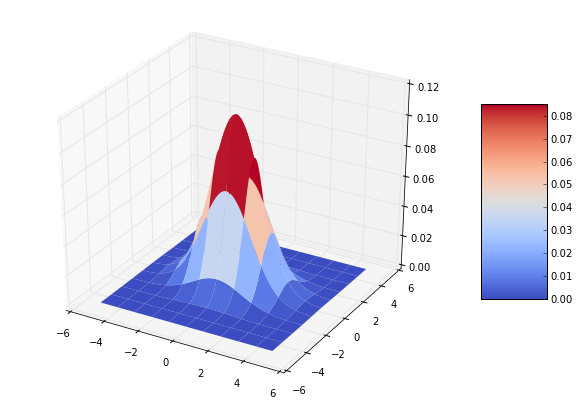

In [6]:
from scipy.stats import multivariate_normal

minVal   = -5
maxVal   = 5
stepSize = 0.1
xAxisVal = np.arange(minVal, maxVal, stepSize)
yAxisVal = np.arange(minVal, maxVal, stepSize)
xx, yy = np.meshgrid(xAxisVal, yAxisVal)

cov = np.array([[2, 0], [0, 1]]) # Identity matrix
mu = np.array([0,0])
var = multivariate_normal(mean=mu, cov=cov)

fig = plt.figure(figsize=(10,7))
ax = fig.gca(projection='3d')
surf = ax.plot_surface(xx, yy, var.pdf(np.stack([xx,yy], 2)), cmap=cm.coolwarm, linewidth=0)

fig.colorbar(surf, shrink=0.5, aspect=3)
plt.show()

#### 이를 numpy.matmul의 broadcasting을 이용하면 편하게 구할 수 있다.
numpy.matmul의 경우 2D를 넘어가는 행렬의 경우 맨 뒤 2개 차원만을 행렬이라고 생각하고 Matrix multiplication을 수행한다. 이 기능을 사용하면 for문 없이도 효율적으로 값을 계산할 수 있다.
- https://docs.scipy.org/doc/numpy-dev/reference/generated/numpy.matmul.html

따라서, 

$\begin{bmatrix}x_1 - \mu_1 & x_2 - \mu_2 \end{bmatrix}$는 [N x N x 1 x 2]의 크기로

$\begin{bmatrix} \Sigma_{11} & \Sigma_{12} \\ \Sigma_{21} & \Sigma_{22} \end{bmatrix}^{-1}$는 그대로 [2 x 2]

$\begin{bmatrix}x_1 - \mu_1 \\ x_2 - \mu_2 \end{bmatrix}$는 [N x N x 2 x 1]의 크기로

생각하고 numpy.matmul을 적용하면 계산을 할 수 있다.

In [94]:
# Complete the function
def normal_dist_2d(x, y, mu, cov):
    icov = np.linalg.inv(cov)
    x_ = x - mu[0] # [N x N x D]
    y_ = y - mu[1] # [N x N x D]

    Xt = np.stack([x_,y_], 2)
    Xt = np.expand_dims(Xt, 2)

    X = 
    X = 

    CX   = 
    XtCX = 
    val  = np.exp(-XtCX/2)/(2*np.pi*np.sqrt(np.linalg.det(cov)))
    
    return np.squeeze(val)

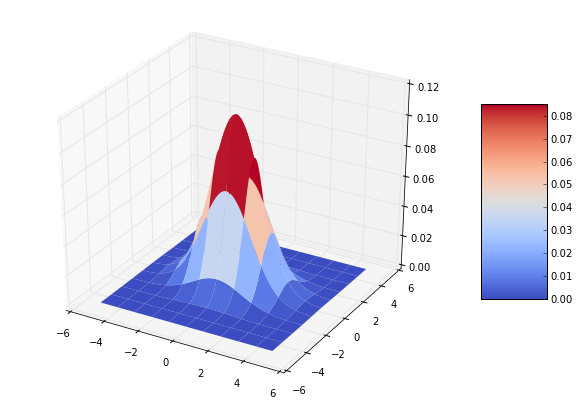

In [105]:
cov = np.array([[2, 0], [0, 1]]) # Identity matrix
mu = np.array([0,0])

minVal   = -5
maxVal   = 5
stepSize = 0.1
xAxisVal = np.arange(minVal, maxVal, stepSize)
yAxisVal = np.arange(minVal, maxVal, stepSize)
xx, yy = np.meshgrid(xAxisVal, yAxisVal)

fig = plt.figure(figsize=(10,7))
ax = fig.gca(projection='3d')
surf = ax.plot_surface(xx, yy, normal_dist_2d(xx,yy,mu,cov), cmap=cm.coolwarm, linewidth=0)

fig.colorbar(surf, shrink=0.5, aspect=3)
plt.show()